___


___
# Ecommerce Store - Linear Regression Project

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!


## Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Get the Data

Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [2]:
customers = pd.read_csv("Ecommerce Customers")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Studying correlation between different pairs of numerical columns

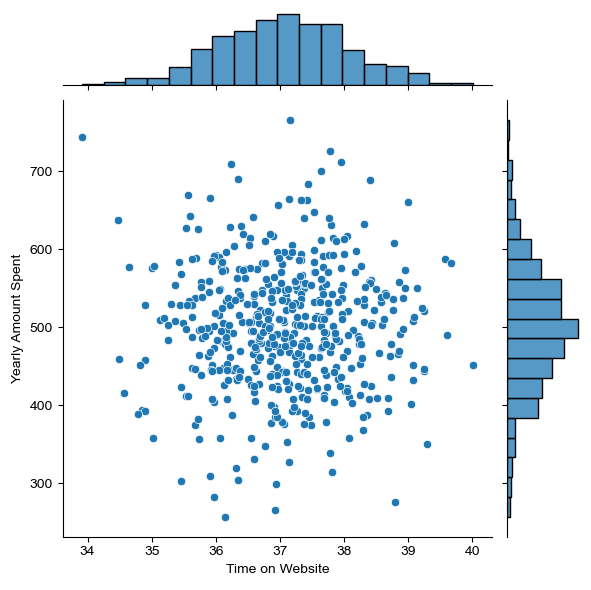

In [5]:
customers.head()
sns.jointplot(data = customers ,x = "Time on Website",y ="Yearly Amount Spent" )
sns.set_style("whitegrid")

**Time on App column instead. **

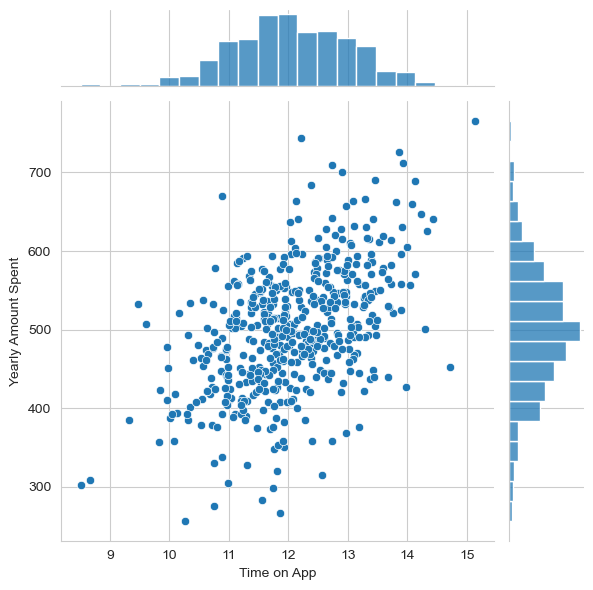

In [6]:
sns.jointplot(data = customers ,x = "Time on App",y = "Yearly Amount Spent")
sns.set_style("whitegrid")

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

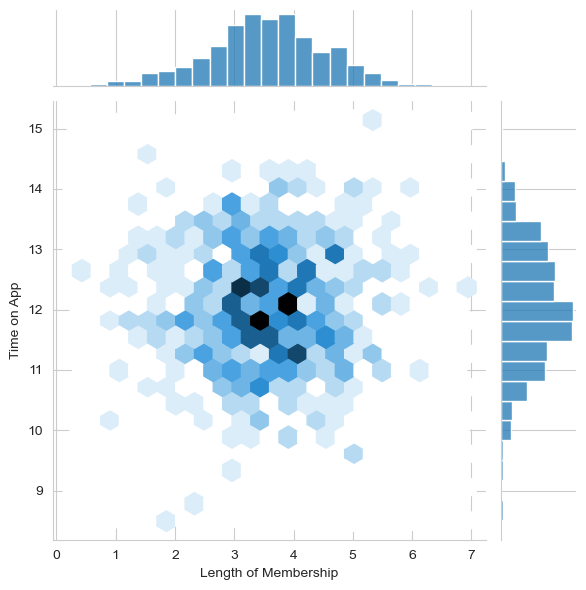

In [7]:
sns.jointplot(data = customers ,x = "Length of Membership",y = "Time on App", kind = "hex")

**Let's explore these types of relationships across the entire data set.

C:\Users\Prakhar Rustagi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


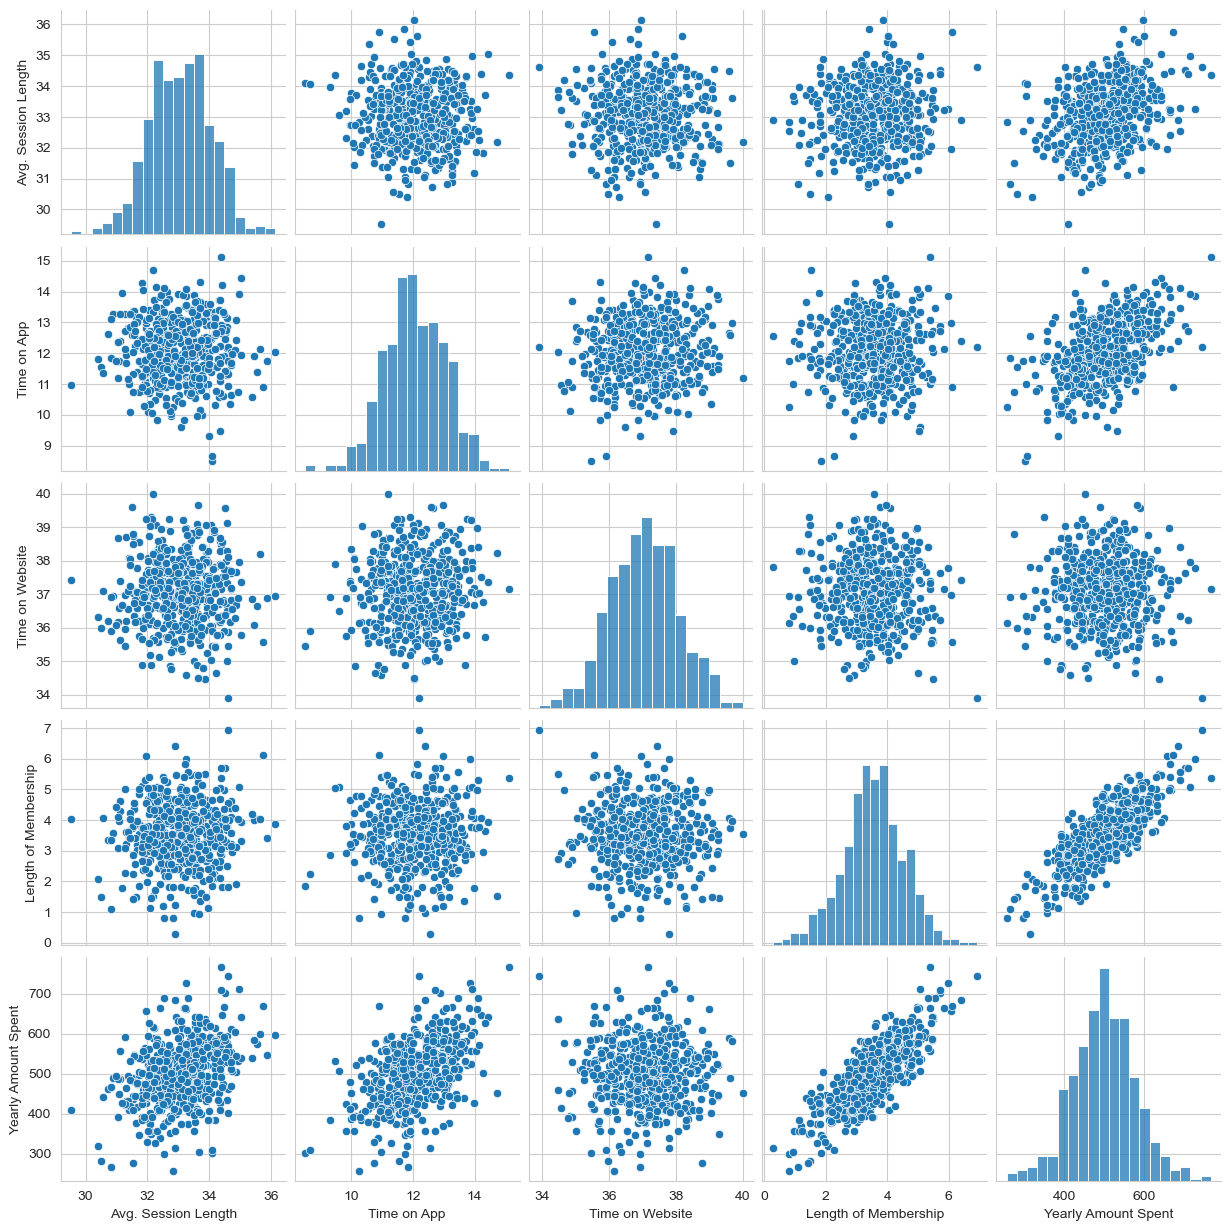

In [8]:
sns.pairplot(customers)


**LENGTH OF MEMBERSHIP SEEMS TO BE THE MOST CORRELATED FIELD WITH YEARLY AMOUNT**

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

C:\Users\Prakhar Rustagi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


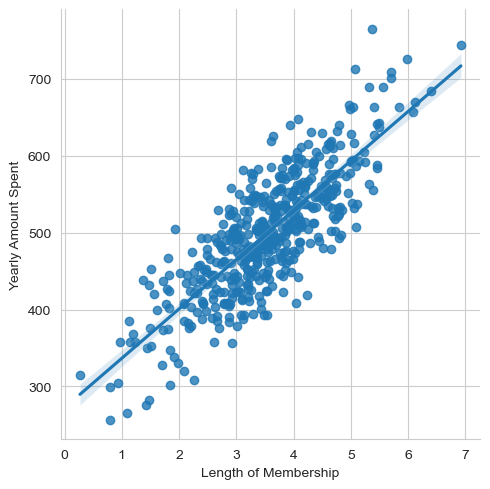

In [9]:
sns.lmplot(data = customers,x= "Length of Membership",y = "Yearly Amount Spent")

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
customers.columns

X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

y = customers['Yearly Amount Spent']

In [12]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Setting test_size=0.3 and random_state=101**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

## Training the Model

Now its time to train our model on our training data!


In [14]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [15]:
lm = LinearRegression()

** Training lm on the training data.**

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
print(lm.coef_)
print(lm.intercept_)

[25.98154972 38.59015875  0.19040528 61.27909654]
-1047.932782250239


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!



In [18]:
predictions = lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

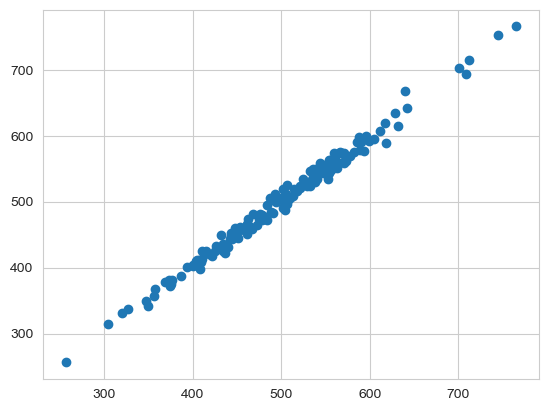

In [19]:
plt.scatter(y_test,predictions)
plt.x_label("y_test")
plt.y_label("X_test")

## it is linear so it is good

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [ ]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

## Residuals

Good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [ ]:
sns.displot((y_test-predictions), bins = 25, kde = True)

## Conclusion


In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=["Coeff"])
cdf

1) Time on App contributes more to the yearly amount spent than Time on Whatsapp
2) As per business requirements :
    a) If the company wants to keep only on medium then they should keep "TIME ON APP" and push more efforts There.
    b) If the company wants to build both , then they should invest their efforts on "TIME ON WEBSITE" as it needs more work.
3) Yearly Amount is highly related with Length of Membership, and it is the best indicator of the revenue!

*Answer here*

    a) If the company wants to keep only on medium then they should keep "TIME ON APP" and push more efforts There.
    b) If the company wants to build both , then they should invest their efforts on "TIME ON WEBSITE" as it needs more work.

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.